In [2]:
import matplotlib

In [3]:
from plotly.graph_objs import *

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [7]:
import plotly.graph_objs as go

In [8]:
import plotly.plotly as py

In [9]:
import datetime, requests

In [14]:
url_plantilla_Serie = 'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/{codigo}?nult={num_datos}'

In [15]:
url_plantilla_Tabla= 'http://servicios.ine.es/wstempus/js/ES/DATOS_TABLA/{codigo}?nult={num_datos}'

# Primero importamos los datos

In [16]:
codigo = "9663"

In [17]:
num_datos=100

In [18]:
url = url_plantilla_Tabla.format(codigo=codigo,num_datos=num_datos)

In [21]:
respuesta_poblacion_16 = requests.get(url)

In [22]:
datos_poblacion_16=pd.DataFrame(respuesta_poblacion_16.json())

In [23]:
datos_poblacion_16.drop([0,1,2,318,319,320],inplace=True)

In [24]:
spliteador_edad = lambda x: x.split('.')[1].split()[0]

In [25]:
spliteador_genero=lambda x: x.split('.')[2].strip()

In [72]:
spliteador_edad_genero=lambda x: [x.split('.')[1].split()[0],x.split('.')[2].strip()]

In [26]:
df1=datos_poblacion_16[datos_poblacion_16['Nombre'].apply(spliteador_genero)!='Total']

In [138]:
df1.loc[[4]]['Data'].values[0]

[{'Anyo': 2017,
  'FK_Periodo': 26,
  'FK_TipoDato': 2,
  'Fecha': 1483225200000,
  'Secreto': False,
  'Valor': 209617.0},
 {'Anyo': 2016,
  'FK_Periodo': 27,
  'FK_TipoDato': 2,
  'Fecha': 1467324000000,
  'Secreto': False,
  'Valor': 210958.0},
 {'Anyo': 2016,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1451602800000,
  'Secreto': False,
  'Valor': 215948.0},
 {'Anyo': 2015,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1435701600000,
  'Secreto': False,
  'Valor': 215729.0},
 {'Anyo': 2015,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1420066800000,
  'Secreto': False,
  'Valor': 220124.0},
 {'Anyo': 2014,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1404165600000,
  'Secreto': False,
  'Valor': 216744.0},
 {'Anyo': 2014,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1388530800000,
  'Secreto': False,
  'Valor': 218576.0},
 {'Anyo': 2013,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1372629600000,
  'Secreto': False,
  'Valor': 223136.0},
 {'Anyo'

In [123]:
dict_poblacion_16=[[df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0],int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']]
                   for x in df1.index for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [124]:
trama=pd.DataFrame(dict_poblacion_16,columns=['Genero','Edad','Poblacion'])

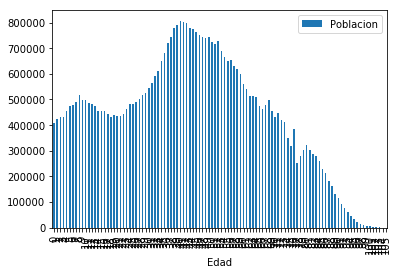

In [145]:
trama.groupby('Edad')[['Poblacion']].sum().plot.bar()

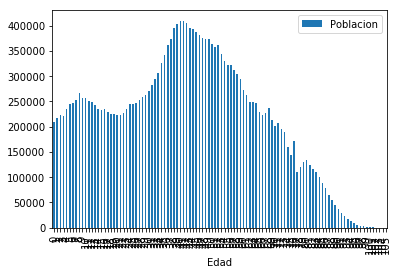

In [144]:
trama[trama['Genero']=='Hombres'].groupby('Edad')[['Poblacion']].sum().plot.bar()

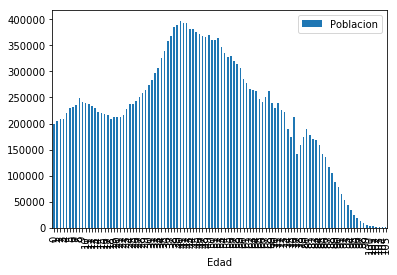

In [142]:
trama[trama['Genero']=='Mujeres'].groupby(['Edad'])[['Poblacion']].sum().plot.bar()

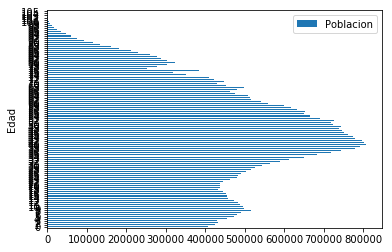

In [156]:
trama.groupby(['Edad'])[['Poblacion']].sum().plot.barh()


In [167]:
dict_hombres=[[int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']] 
for x in df1.index if df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0]=='Hombres' 
for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [168]:
dict_mujeres=[[int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']] 
for x in df1.index if df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0]=='Mujeres' 
for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [180]:
panda_hombres=pd.DataFrame(dict_hombres,columns=['Edad','Hombres'])
panda_mujeres=pd.DataFrame(dict_mujeres,columns=['Edad','Mujeres'])

In [184]:
panda_poblacion=pd.merge(panda_hombres,panda_mujeres,on='Edad')

In [185]:
panda_poblacion

,Edad,Hombres,Mujeres
0,0,209617.0,198177.0
1,1,218078.0,205503.0
2,2,222981.0,209052.0
3,3,221075.0,208665.0
4,4,234704.0,220532.0
5,5,244405.0,229566.0
6,6,247158.0,232215.0
7,7,253140.0,236473.0
8,8,266650.0,249693.0
9,9,257660.0,241446.0


In [186]:
panda_poblacion['Edad']

0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
10      10
11      11
12      12
13      13
14      14
15      15
16      16
17      17
18      18
19      19
20      20
21      21
22      22
23      23
24      24
25      25
26      26
27      27
28      28
29      29
      ... 
76      76
77      77
78      78
79      79
80      80
81      81
82      82
83      83
84      84
85      85
86      86
87      87
88      88
89      89
90      90
91      91
92      92
93      93
94      94
95      95
96      96
97      97
98      98
99      99
100    100
101    101
102    102
103    103
104    104
105    105
Name: Edad, Length: 106, dtype: int64

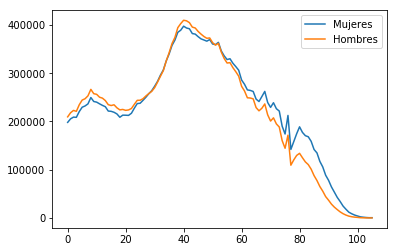

In [205]:
plt.plot(panda_poblacion['Edad'],panda_poblacion['Mujeres'],
         panda_poblacion['Edad'],panda_poblacion['Hombres'])
plt.legend(['Mujeres','Hombres'])

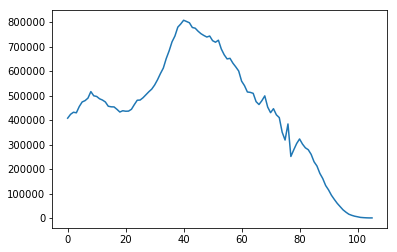

In [195]:
plt.plot(panda_poblacion['Edad'],panda_poblacion['Hombres']+panda_poblacion['Mujeres'])